In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Trabajo realizado por Erik Job Herebia Sosa 4.623.741

[ 0. 10.]
[12. 20.]
0.0 12.0 0.9975786045111337 224.3313245927677
0.0 20.0 0.9970035350957476 249.55234426446927
10.0 12.0 0.9981629787974335 195.39531240805024
10.0 20.0 0.9984773587292524 177.89176935322902
Global 0.9978056192833917 213.55662330872573


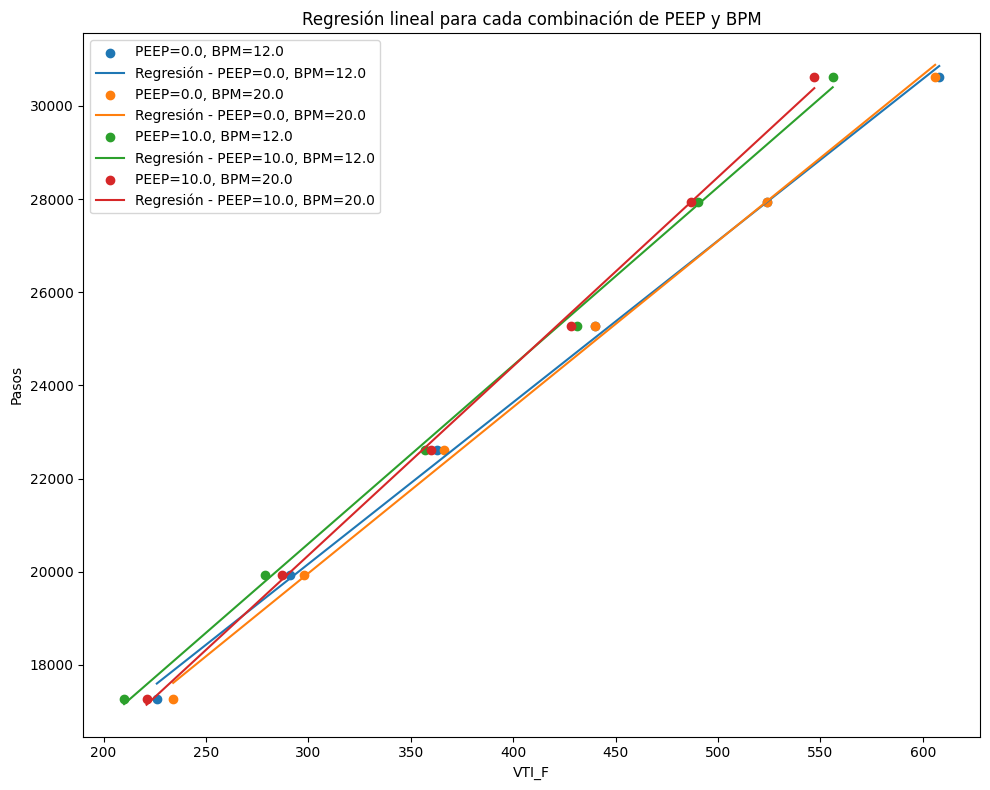

In [10]:
print("Trabajo realizado por Erik Job Herebia Sosa 4.623.741")
print()
# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    X = np.column_stack((np.ones(len(X)), X))
    
    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y

    return coeficientes  

# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.column_stack((np.ones(len(X)), X))
    return  Xm @ coeficientes

# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean(error ** 2))

def r2F(y_true, y_pred):
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val

opcion=int(input())
# Cargar los datos
data = pd.read_csv('Mediciones.csv')
data = data.dropna()

# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion==1:
    #imprimir numero de filas y numero de columnas
    print(len(data),len(data.columns))
    
    #seleccionar las caracteristicas(variables dependientes) y el objetivo
    caracteristicas = ['VTI_F', 'PEEP', 'BPM', 'VTE_F'] # imprima las caracteristicas
    objetivo = ['Pasos']  # 
    print(caracteristicas)
    print(objetivo)
elif opcion==2: 
    # modelo completo solo con VTI_F, completar la funcion regresion manual
    
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)
elif opcion==3: 
    # modelo completo solo con VTI_F, completar las funciones que definen las métricas
    X = data['VTI_F']
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print( coef)
    y_pred = predecir(X,coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # imprimir los primeros 2 elementos de y e y_pred
    # print(y[:3],  y_pred [COMPLETAR])
    print(y[:3],  y_pred [:3])
    # imprimir r2 y rmse
    print(r2_,  rmse_val )
elif opcion==4: 
    # modelo completo solo con VTI_F, completar la función ajustar_evaluar_modelo
    X_todo =data['VTI_F']  #data[completar]
    y =data['Pasos'] # data[completar]
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
elif opcion==5:
   # Completar la combinaciones de características de los modelos solicitados 
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F', 'PEEP', 'BPM'],
        'Modelo_5': ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
      #COMPLETAR EL DICCIONARIO
    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]#data[completar]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo,r2, rmse_val)
elif opcion==6:
    # Modelos para cada combinación de PEEP y BPM
    valores_peep_unicos = data['PEEP'].unique()#completar sugerencia, utilizar unique()
    valores_bpm_unicos = data['BPM'].unique() #completar
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    fig,ax= plt.subplots(figsize=(10,8))
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]  #completar el filtrado de datos, se deben filtrar los datos para cada para par de PEEP y BPM  
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset)
            predicciones_totales.append(y_pred_subset)
            ax.scatter(X_subset, y_subset, label=f"PEEP={peep}, BPM={bpm}")
            ax.plot(X_subset, y_pred_subset, label=f"Regresión - PEEP={peep}, BPM={bpm}")
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y=data['Pasos']
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global)
    ax.set_xlabel('VTI_F')
    ax.set_ylabel('Pasos')
    ax.set_title('Regresión lineal para cada combinación de PEEP y BPM')
    ax.legend()
    plt.tight_layout()
    plt.show()

